# Data Viz with Categorical Data

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

cars = pd.read_csv('cars.csv')
barley = pd.read_csv('barley.csv')

# only for Jupyter
%matplotlib inline

For this section, we will be using both the `barley` dataset and the `cars` dataset. You will get some experience setting up ML for categorical data, and see a few more types of plots you can do with categorical data, and some you can do to combine quantitative and categorical data.

The `cars` dataset is a dataset with a bunch of different models of car, with several different statistics about each of them, including their horsepower, acceleration, etc., the year they were released, and their country of origin. Here's what it looks like:

In [2]:
cars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


You may have seen the `barley` dataset before - it's a bunch of measurements of barley yields at several different sites and over multiple years.

In [3]:
barley.head()

,yield,variety,year,site
0,27.00000,Manchuria,1931,University Farm
1,48.86667,Manchuria,1931,Waseca
2,27.43334,Manchuria,1931,Morris
3,39.93333,Manchuria,1931,Crookston
4,32.96667,Manchuria,1931,Grand Rapids


## Problem 1) Bar Chart

Plot a bar chart of the origin in the `cars` dataset. Remember to use the right function in `seaborn` - don't use `barplot` yet, it won't work quite right. Remember to add a descriptive axis labels and a title to your plot. Your plot should look like this:  
  
![plot](ml_dataviz_img/origin_bar.png)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a

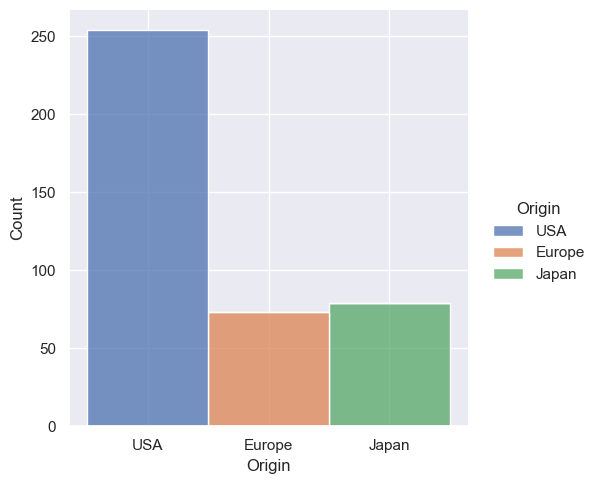

In [12]:
# Enter your solution here!
sns.displot(data=cars, x='Origin', hue='Origin', legend=True, multiple='stack')
plt.show()

## Problem 2) Combined Categorical with Quantitative Plot

Plot a categorical chart of the `barley` dataset with the 'site' along the x-axis, the yield along the y-axis, and the color according to the variety of barley. There are two variants of this graph you can try out - the first if you just plot it, and the second if you did the extra practice with `groupby`, try and group according to the variety and the site at once, and reset the index. Here are a couple plots you could come up with:  
  
![plot](ml_dataviz_img/yield_vs_site_overall.png) ![plot](ml_dataviz_img/yield_vs_site_mean.png)

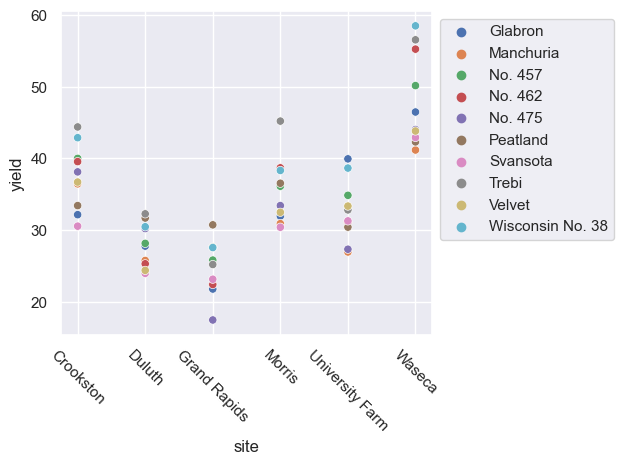

In [43]:
mean = barley.groupby(['site', 'variety'])['yield'].mean().reset_index()
ax = sns.scatterplot(data=mean, x='site', y='yield', hue='variety')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=-45)
plt.tight_layout()
plt.show()

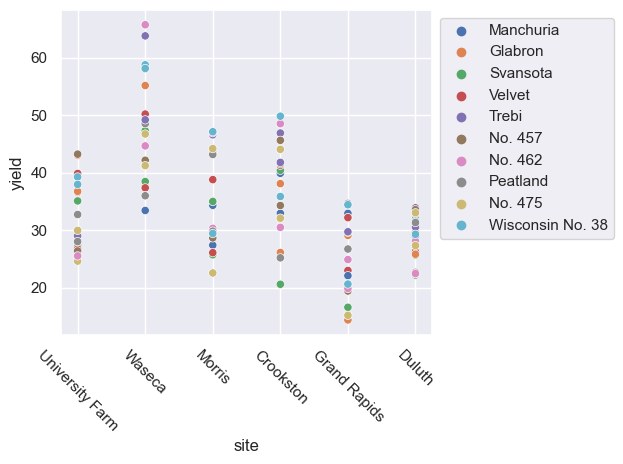

In [27]:
ax = sns.scatterplot(data=barley, x='site', y='yield', hue='variety')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=-45)
plt.tight_layout()
plt.show()

## Just for Kicks: Barley Heatmap

`seaborn` has a `heatmap` function which produces some entertaining results. It takes two Categorical or Ordinal variables and plots them against each other, with the color of the corresponding box correlated to a third, quantitative, variable. To get data for this, we will have to `groupby` the `barley` dataset, then use `barley.pivot` to change the index and columns of the `DataFrame`. See if you can figure out what it does based on the `groupby` statement and the result. Take a look at the `pivot` [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html) if this interests you.

In [ ]:
barley_pivot = barley.loc[:, ['year', 'site', 'yield']]
barley_pivot = barley_pivot.groupby(['year', 'site']).sum()
barley_pivot = barley_pivot.reset_index()
barley_pivot['yield'] = barley_pivot['yield'].astype(int)
barley_pivot = barley_pivot.pivot('year', 'site', 'yield')
barley_pivot

Now, we can create our heatmap. See from `barley_pivot` that it isn't really doing anything special, as it closely follows the `DataFrame`. Notice that we can very clearly see which years and sites did well overall - the same point could have been shown with a different plot, but this is still interesting to see.

In [ ]:
sns.heatmap(barley_pivot, annot=True, fmt='d')
plt.ylabel('Year')
plt.xlabel('Site')
plt.xticks(rotation=45)
plt.show()